# EDA Project:

## Process Flow:

01. **Import the required libraries:**
02. **Read and Understand the data:**
    - **Data Cleaning:**
03. **Data Exploration:**
      - **Univariate Analysis:**
      - **Binning:**
      - **Bivariate analysis:**
      - **Multivariate analysis:**
04. **Communicate Insights:**
      - **Executive Summary:**
      - **Actionable Recommendations:**

## Business Objective

-  **This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row. And which factors affect more on the attendance such as: (hypertension, diabetes, alcoholism and handicap), in adition age, gender or receiving sms.**

-  Variables:
   PatientId -->> A unique identifier for each Patient.

- AppointmentID -->> A unique identifier for each appointment.

- Gender -->> The gender of the patient.

-  ScheduledDay -->> The date on which the appointment was booked or scheduled.

-  AppointmentDay -->> The date on which the appointment was occur.

-  Age -->> The age of the patient.

-  Neighbourhood -->> Locality of the patient/clinic

-  Hipertension(Boolean) ->> 0(Not Suffering)/ 1(Suffering)

-  Diabetes(Boolean) -->> 0(Not Suffering)/ 1(Suffering)

-  Alcoholism(Boolean) -->> 0(Not Suffering)/ 1(Suffering)

-  Handcap(Boolean) -->> 0(Not a Handicap)/ 1(Handicap)

-  Scholarship(Boolean) -->> Financial aid provided to patients. 1(Received)/ 0(Not Received)

-  SMS_received(Boolean) -->> 0(Not Recieved)/ 1(Recieved)

-  No-show -->> Indicates whether a patient missed their scheduled appointment. ("Yes" means they missed it, "No" means they attended).

# 1.Improting Library:

In [1]:
# import neccesary librarie's
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from time import strftime
import warnings
warnings.filterwarnings('ignore')

# 2.Read & Understand the data:

In [2]:
#reading the dataset
df = pd.read_csv(r"C:\Users\aksha\Desktop\Project's upload on github\Self Project\EDA Project's\Medical_Appointments_Data\Data.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#shape of the data
df.shape

(110527, 14)

In [4]:
# info. of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


- As we can see there is no nul value present in the dataset.

In [5]:
#stttistical info. of the data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


## 2.1 Data Cleaning:

In [6]:
#all column name from the data
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [7]:
#correcting the column names
df = df.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap'})

In [8]:
# deleting unnecessary columns
df.drop(['AppointmentID','PatientId','Neighbourhood'],axis=1, inplace=True )

-  Delete AppointmentID and PatientID as it is a uniqu i.d and dosent give much information.

In [9]:
# using derive metrix changing the ScheduledDay and AppointmentDay column to getting dates.
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date.astype('datetime64[ns]')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date.astype('datetime64[ns]')
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,F,2016-04-29,2016-04-29,62,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,8,0,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,56,0,1,1,0,0,0,No


In [10]:
# checking minimum and maximum dates of ScheduledDay data .
max_date = df['ScheduledDay'].max()
min_date = df['ScheduledDay'].min()
print(min_date)
print(max_date)

2015-11-10 00:00:00
2016-06-08 00:00:00


In [11]:
# checking minimum and maximum dates of AppointmentDay data.
max_date_1 = df['AppointmentDay'].max()
min_date_1 = df['AppointmentDay'].min()
print(min_date_1)
print(max_date_1)

2016-04-29 00:00:00
2016-06-08 00:00:00


-  From this, we observe that the data spans approximately 8 months in the ScheduledDay column, from 10-11-2015 to 08-06-2016.
-  In contrast, the AppointmentDay column contains data for only 2 months, from 29-04-2016 to 08-06-2016.
-  we can infer that,people used to book appoinment in between 10-11-2015 to 29-04-2016 and start visiting from 29-04-2016

In [12]:
# segregate days (in 7 days pattern) of two columns (ScheduledDay and AppointmentDay)
df['sch_weekday'] = df['ScheduledDay'].dt.dayofweek
df['app_weekday'] = df['AppointmentDay'].dt.dayofweek

<Axes: xlabel='app_weekday'>

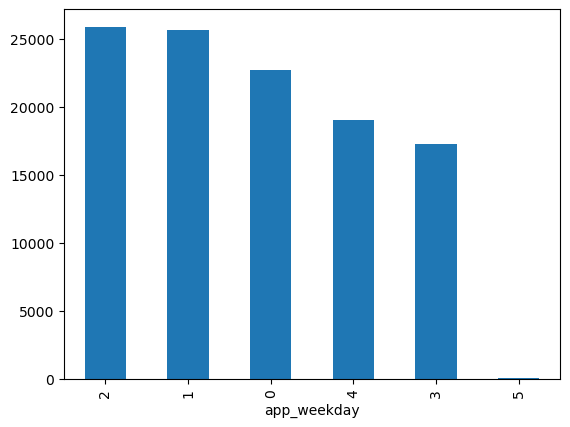

In [13]:
df.app_weekday.value_counts().plot.bar()

<Axes: xlabel='sch_weekday'>

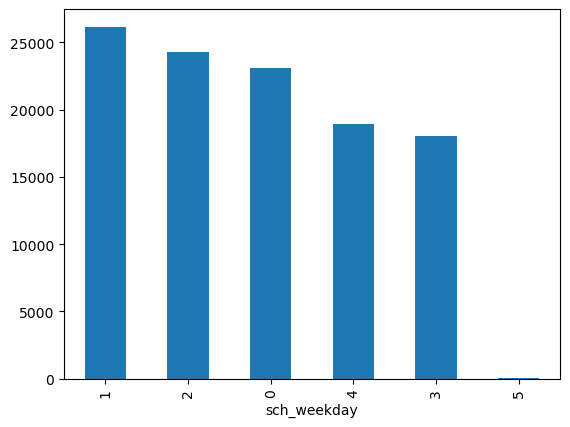

In [14]:
df.sch_weekday.value_counts().plot.bar()

-  From this bar graph, we can see that the hospital operates on weekdays and is closed on weekends.
-  On weekdays, there is a significant rush on Wednesdays and Tuesdays (around 25,000), which gradually decreases from Thursday to Saturday and then starts increasing again from Monday.
-  Hospital is not working on Sunday. 
- Therefore, there is an increasing trend from Monday to Wednesday, followed by a gradual decline.

# 3 Data Exploration:

>  "I'm going to analyze each and every column using bar charts and  various functions to understand the data better."

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Gender          110527 non-null  object        
 1   ScheduledDay    110527 non-null  datetime64[ns]
 2   AppointmentDay  110527 non-null  datetime64[ns]
 3   Age             110527 non-null  int64         
 4   Scholarship     110527 non-null  int64         
 5   Hypertension    110527 non-null  int64         
 6   Diabetes        110527 non-null  int64         
 7   Alcoholism      110527 non-null  int64         
 8   Handicap        110527 non-null  int64         
 9   SMS_received    110527 non-null  int64         
 10  No-show         110527 non-null  object        
 11  sch_weekday     110527 non-null  int32         
 12  app_weekday     110527 non-null  int32         
dtypes: datetime64[ns](2), int32(2), int64(7), object(2)
memory usage: 10.1+ MB


## 3.1 Univariate Analysis:

Gender
F    71840
M    38687
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

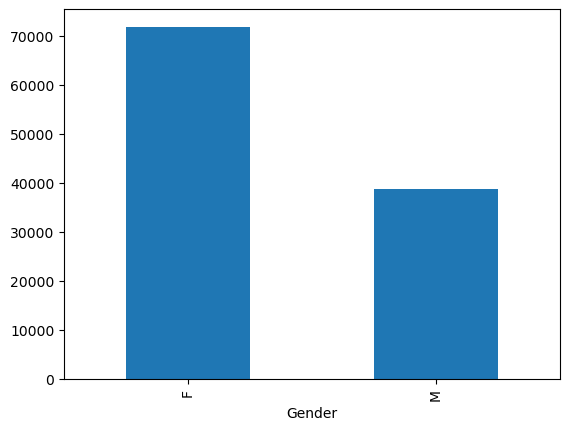

In [16]:
#check gender column
gender_count = df['Gender'].value_counts()
print(gender_count)
df['Gender'].value_counts().plot(kind = 'bar')
plt.show

-  We can observe that our dataset primarily consists of two genders, with a higher number of females compared to males.

In [17]:
# #check Age column using DataFrame
age_count = df['Age'].reset_index()
age_count.columns = ['Age', 'Count']
age_count

,Age,Count
0,0,62
1,1,56
2,2,62
3,3,8
4,4,56
...,...,...
110522,110522,56
110523,110523,51
110524,110524,21
110525,110525,38


In [18]:
#checking the min age and max age in our dataframe
print(df['Age'].max())
print(df['Age'].min())           # unexpected age value

115
-1


Scholarship
0    99666
1    10861
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

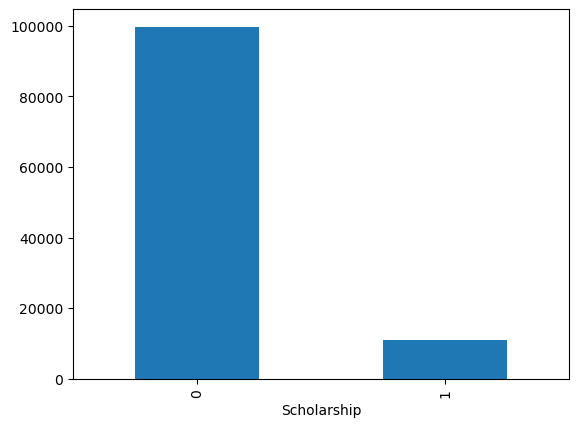

In [19]:
#check Scholarship column
Scholarship_count = df['Scholarship'].value_counts()
print(Scholarship_count)
df['Scholarship'].value_counts().plot(kind = 'bar')
plt.show

-  A majority of people did not receive scholarships, which might be a reason for their not returning.

Hypertension
0    88726
1    21801
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

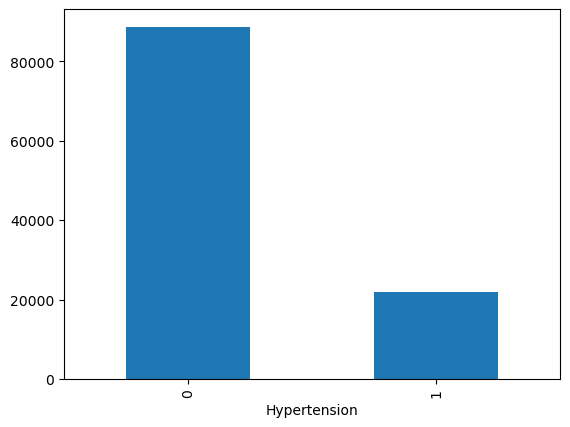

In [20]:
#check Hypertension column
Hypertension_count = df['Hypertension'].value_counts()
print(Hypertension_count)
df['Hypertension'].value_counts().plot(kind = 'bar')
plt.show

-  Among the data, we have around 22,000 people (20%) who are suffering from hypertension problem.

Diabetes
0    102584
1      7943
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

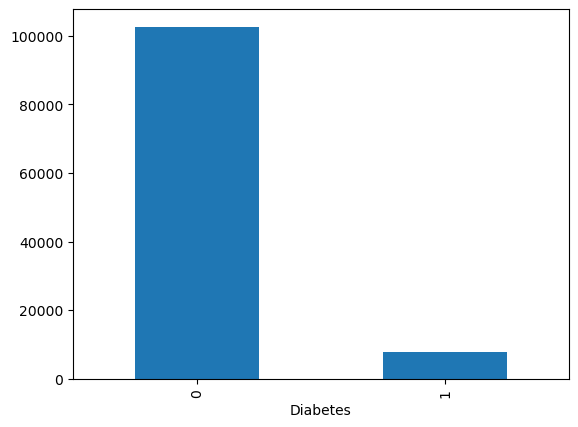

In [21]:
#check Diabetes column
Diabetes_count = df['Diabetes'].value_counts()
print(Diabetes_count)
df['Diabetes'].value_counts().plot(kind = 'bar')
plt.show

-  Among the data, we have around 8000 people (8%) who are suffering from Diabetes problem.

Alcoholism
0    107167
1      3360
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

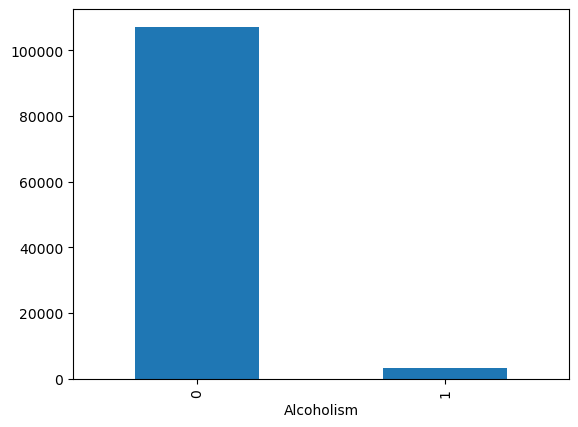

In [22]:
#check Alcoholism column
Alcoholism_count = df['Alcoholism'].value_counts()
print(Alcoholism_count)
df['Alcoholism'].value_counts().plot(kind = 'bar')
plt.show

-  As we can see there are majority of people who are not suffering from alcoholism problem and rest in 3000 (3%) we have critical situation in alchoholism.

In [23]:
#check Handicap column
Handicap_count = df['Handicap'].value_counts()
print(Handicap_count)

Handicap
0    108286
1      2042
2       183
3        13
4         3
Name: count, dtype: int64


In [24]:
# dropping the values for Handicap otherthan 0 & 1 as rest of the didnt give much information.
df.drop(df[df['Handicap'] > 1].index, inplace=True)

<function matplotlib.pyplot.show(close=None, block=None)>

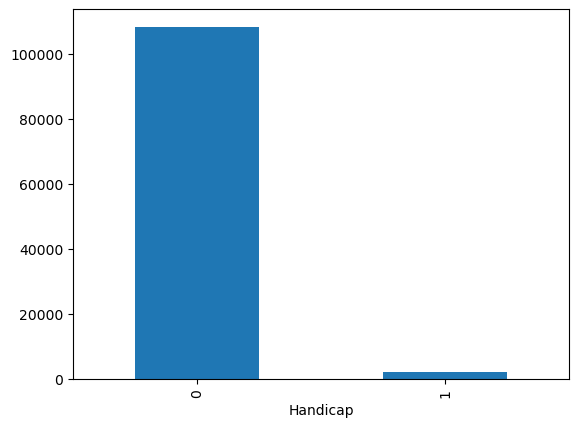

In [25]:
#plot graph for Handicap column
df['Handicap'].value_counts().plot(kind = 'bar')
plt.show

- We have data for 3000 (3%) individuals who are actually disabled. Additionally, they might be suffering from alcoholism.

SMS_received
0    74893
1    35435
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

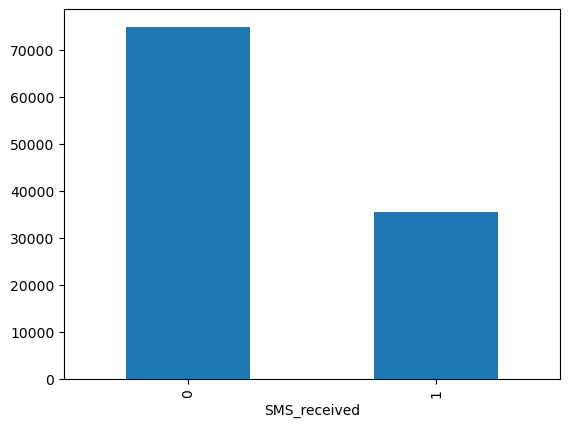

In [26]:
#check SMS_received column
SMS_received_count = df['SMS_received'].value_counts()
print(SMS_received_count)
df['SMS_received'].value_counts().plot(kind = 'bar')
plt.show 

- Most of the people(almost 50% of the data) did not receive a message wich indicates as 1.

No-show
No     88050
Yes    22278
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

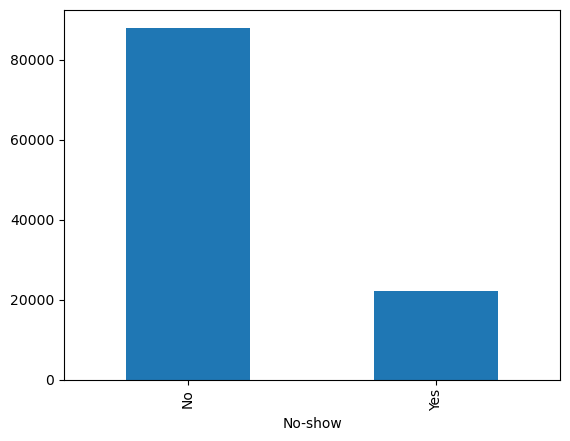

In [27]:
#check No-show column
No_show_count = df['No-show'].value_counts()
print(No_show_count)
df['No-show'].value_counts().plot(kind = 'bar')
plt.show

-  No, means attend the appoinment. Around 88000 people attended
-  Yes, means they missed the appoinment. Around 22000 people missed it.

In [28]:
# calculating the percentage of appointments  
100*df['No-show'].value_counts()/len(df['No-show'])

No-show
No     79.807483
Yes    20.192517
Name: count, dtype: float64

- We found that 80% of people who scheduled an appointment and 20% missed the appoinment. 

In [29]:
#check missing data in dataframe
missing = pd.DataFrame((df.isnull().sum() * 100) / df.shape[0]).reset_index()
missing.columns = ['Column', 'Percentage of Missing Values']
missing

,Column,Percentage of Missing Values
0,Gender,0.0
1,ScheduledDay,0.0
2,AppointmentDay,0.0
3,Age,0.0
4,Scholarship,0.0
5,Hypertension,0.0
6,Diabetes,0.0
7,Alcoholism,0.0
8,Handicap,0.0
9,SMS_received,0.0


- AS we can see there are no missing values in our data set.no need to Use with box plot.

## 3.1 Binning:

In [30]:
# creat the bins for age column
df.Age=pd.cut(df.Age,bins=[20,30,40,50,60,70],labels=['<30','30-40','40-50','50-60','>60'])
df.Age.value_counts()

Age
50-60    15639
30-40    15027
40-50    14402
<30      13771
>60      11167
Name: count, dtype: int64

<Axes: xlabel='Age'>

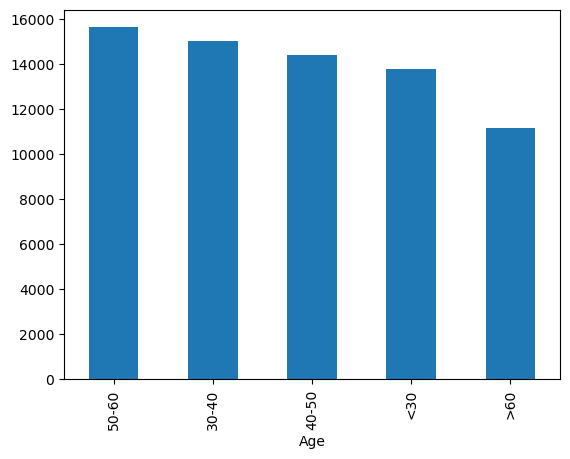

In [31]:
df.Age.value_counts().plot.bar()

- The majority of the data falls within the age range of 50 to 60, with approximately 15,600 individuals in this category.
- The second highest number of people, around 15,000, falls within the age range of 30 to 40.
- The age range of 40 to 50 follows, but it's notable that individuals above 60 years old, who might be expected to have regular check-ups, are significantly fewer in number in this dataset.

## 3.3 Bivariate Analysis:

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110328 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Gender          110328 non-null  object        
 1   ScheduledDay    110328 non-null  datetime64[ns]
 2   AppointmentDay  110328 non-null  datetime64[ns]
 3   Age             70006 non-null   category      
 4   Scholarship     110328 non-null  int64         
 5   Hypertension    110328 non-null  int64         
 6   Diabetes        110328 non-null  int64         
 7   Alcoholism      110328 non-null  int64         
 8   Handicap        110328 non-null  int64         
 9   SMS_received    110328 non-null  int64         
 10  No-show         110328 non-null  object        
 11  sch_weekday     110328 non-null  int32         
 12  app_weekday     110328 non-null  int32         
dtypes: category(1), datetime64[ns](2), int32(2), int64(6), object(2)
memory usage: 10.2+ MB


- As everything is good we can go with further analysis
- For further analysis, we will use the "No-show" column as the target variable.

<Axes: title={'center': 'No-show'}, xlabel='No-show', ylabel='count'>

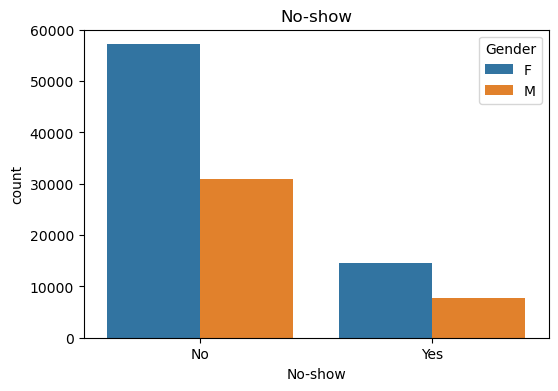

In [91]:
# no-Show rate based on gender column.
plt.figure(figsize=(6,4))
plt.title('No-show')
sns.countplot(x=df['No-show'], hue=df.Gender)

-  From this analysis, it appears that more females appointed for the check up around 55000 and around 30000 male.
-  On other hand, aroung 14000 femles were missed the apppoinment and 7000 male.
-  From this data, we can infer that gender might have an effect on attendance. Specifically, there seems to be a higher number of females attending appointments compared to males.

<Axes: title={'center': 'No-show'}, xlabel='No-show', ylabel='count'>

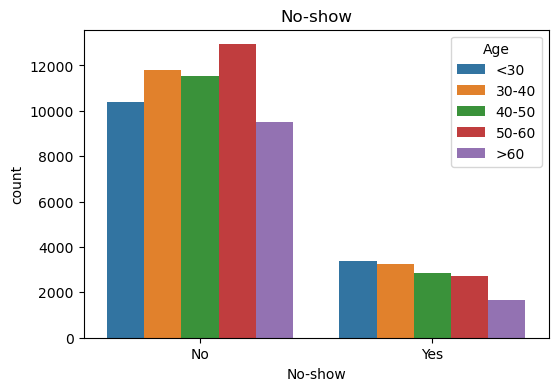

In [92]:
# no-show rate in Age column
plt.figure(figsize=(6,4))
plt.title('No-show')
sns.countplot(x=df['No-show'], hue=df.Age)

- **In the age group between 50 to 60 years:**
- Approximately 16,000 people booked appointments.
- Out of these, about 14,000 people attended their appointments. Around 2,000 people missed their appointments.
- This suggests a strong attendance rate within this age category, indicating that the bookings are likely genuine rather than fraudulent.
- **In the age group under 30 (teenagers):**
- Approximately 14,000 students booked appointments.
- Out of these, about 10,000 students attended their appointments.Around 4,000 students missed their appointments.
- Also, we have data for 10,000 issued scholership.
- This indicates a higher no-show rate among teenagers compared to the age group between 50 to 60 years. The issuance of scholarships could be a factor to consider when analyzing attendance patterns, potentially influencing attendance behavior in this demographic.

<Axes: title={'center': 'No-show'}, xlabel='Diabetes', ylabel='count'>

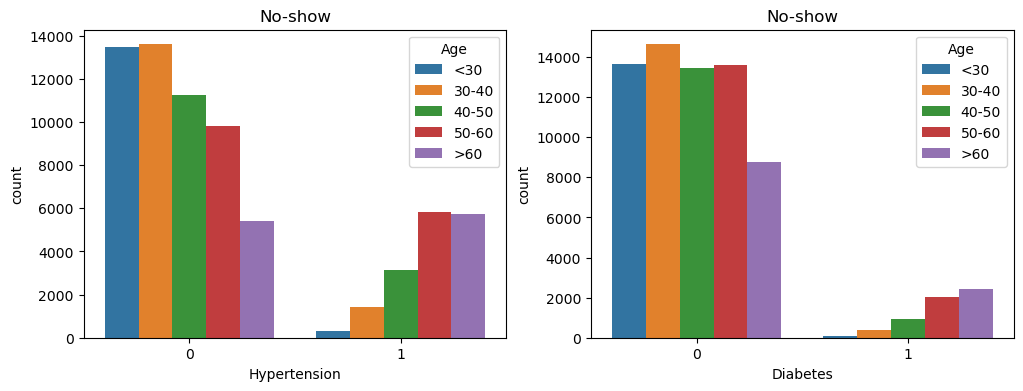

In [102]:
# major deases accoding to age
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title('No-show')
sns.countplot(x=df['Hypertension'], hue=df.Age)

plt.subplot(1,2,2)
plt.title('No-show') 
sns.countplot(x=df['Diabetes'], hue=df.Age)

- **Hypertension and diabetes are distributed across different age groups.**
- Ages 0 to 30: No reported cases of hypertension or diabetes.
- Ages 30 to 40: Out of 15,000 people, 1,000 suffer from hypertension, with very few cases of diabetes.
- Ages 40 to 50: Of the 14,000 people in this age range, 3,000 have hypertension and 1,000 have diabetes. It indicates that while diabetes remains rare, hypertension begins to rise significantly from age 40.
-  Ages 50 to 60: Among 16,000 people, 6,000 suffer from hypertension, and around 2,000 have diabetes.
-  Ages 50+: There's a significant increase in hypertension cases and a noticeable rise in diabetes cases.  

<Axes: title={'center': 'Diabetes by Age and Gender'}, xlabel='Age', ylabel='Diabetes'>

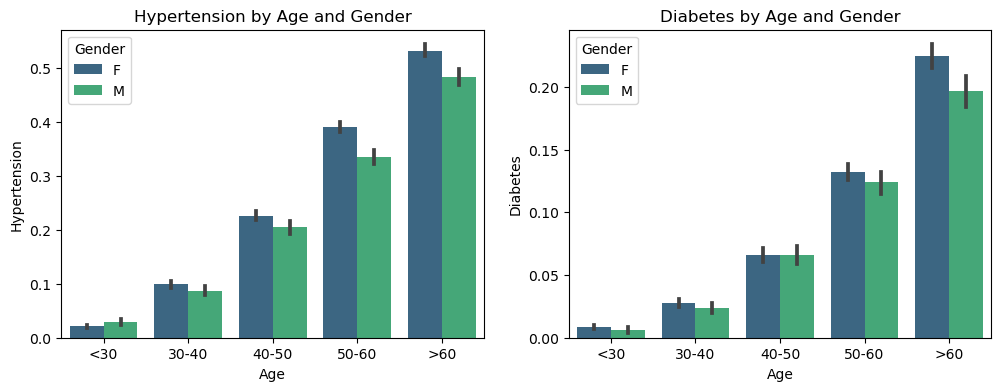

In [108]:
# major deases accoding to gender and age
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title('Hypertension by Age and Gender')
sns.barplot(x=df.Age,y=df.Hypertension,hue=df.Gender, palette='viridis')

plt.subplot(1,2,2)
plt.title('Diabetes by Age and Gender')
sns.barplot(x=df.Age,y=df.Diabetes,hue=df.Gender, palette='viridis')

- **Hypertension and diabetes are distributed across different age groups and in gender.**
- General Observation: Females have a higher prevalence of both hypertension and diabetes compared to males.
- Ages 30+: Females have a higher likelihood of developing hypertension and diabetes starting from the age of 30 compared to males.
- Ages 40 to 50: The incidence of diabetes is similar for both males and females in this age group.
- Ages 60+: Females have a significantly higher chance of having hypertension and diabetes than males.
- Overall Trend: As age increases, the incidence of both hypertension and diabetes increases significantly for both genders.

<Axes: title={'center': 'Age wise Scholership'}, xlabel='Age', ylabel='Scholarship'>

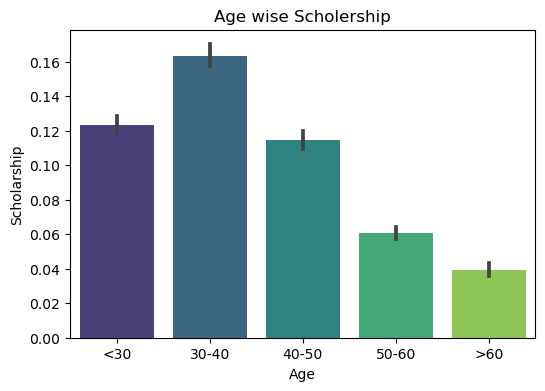

In [111]:
# provided Scholership to age group
plt.figure(figsize=(6,4))
plt.title('Age wise Scholership')
sns.barplot(x=df.Age,y=df.Scholarship, palette='viridis')

- **Age wise Scholership**
- highlight trends in the utilization of scholarships or financial aid for medical appointments across different age groups.
- Age Group 30-40: A significant number of people in this age group receive scholarships or financial aid for medical appointments. Also, This age group also shows a high likelihood of scheduling medical appointments.
- Under 30 and 40-50 Age Groups: There is a notable trend where a considerable number of individuals, particularly students (under 30) and those aged 40-60, apply for scholarships but do not schedule medical appointments.
- Lack of Interest (Age 40+): Individuals aged 40 and above show a decreased interest in applying for scholarships or financial aid from hospitals.

<Axes: title={'center': 'Alcoholism by Age and Gender'}, xlabel='Age', ylabel='Alcoholism'>

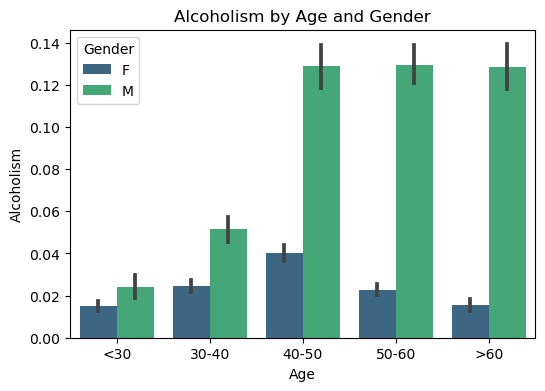

In [116]:
# Alcoholism problem according to gender and age
plt.figure(figsize=(6,4))
plt.title('Alcoholism by Age and Gender')
sns.barplot(x=df.Age,y=df.Alcoholism,hue=df.Gender, palette='viridis')

- **Alcoholism problem distributed across different age groups and in gender.**
- Ages 50+: The bar graph clearly shows that most males over 50 tend to become addicted to alcohol.
- Overall Prevalence: Only 3% of the people in our dataset (around 3,300 individuals) are suffering from alcoholism problem.
- Females: Females are more likely to quit alcohol after the age of 50.

# 4.Communicate Insights:

## 4.1 Executive Summary:

1) **Rate of diseases affect on the attendance?**
-  Among approximately 88,726 patients without hypertension, about 78% attended their visits. Conversely, out of 21,801 patients with hypertension, around 85% attended their appointments.
-  Among approximately 102,584 patients without diabetes, about 80% attended their visits. In contrast, out of 7,943 patients with diabetes, around 83% showed up for their appointments.
2) **Which age and gender used to come in the hospital?**
- The majority of patients visiting the hospital are females, especially those aged between 50 and 60, primarily dealing with hypertension and diabetes.
3) **Is receiving sms affect on attendance?**
- This has impacted the appointment numbers, as our data shows that 35,435 people did not receive an SMS, and 22,278 people missed their appointments. We can infer that around 11,000 people might have missed their appointments, with the lack of SMS notification potentially being a contributing factor.
4) **Gender affect on the attendance?**
-  Yes, it affects appointment attendance to some extent. Out of approximately 55,000 females and 30,000 males who scheduled check-ups, about 14,000 females and 7,000 males missed their appointments. This suggests that females, possibly due to household and other responsibilities, have a higher rate of missed appointmentse.
5) *Hhow many customers atcually booked appoinment and did not come?**
- Around 110,328 customers booked appointments, with 80% attending and 20% missing their appointments. The majority of visitors were females over the age of 40.e
6) **Any of diseases affect on attendance with their age and gender?**
- Yes, according to the data, individuals over 40 often face hypertension and diabetes (or health problems). Additionally, the data suggests that alcohol consumption could be a contributing factor to these health issues, indicating that people should avoid alcohol after the age of 40.r

## 4.2 Actionable Recommendations:

-  **Home Check-Up Services for Household Women:** Providing home check-up services tailored for household women addresses their specific needs and may increase their access to healthcare, improving overall health outcomes.

-  **Enhance the SMS System:** Improving the SMS system for appointment reminders and notifications can help reduce missed appointments and improve patient adherence, leading to better healthcare management and efficiency.

-  **Scholarships for Individuals Aged 35 to 55:** Offering scholarships to individuals in this age range can help support career development or educational opportunities for those who may be underrepresented or in need of financial assistance, potentially leading to a more skilled and educated workforce.

-  **Campaign to Quit Alcohol for Ages 40 to 60:** Running a campaign encouraging individuals aged 40 to 60 to quit alcohol can address a significant health risk factor, potentially reducing the incidence of related health issues such as hypertension and diabetes.

### Auother:-

### Axar Patel